# Challenge 1: Multinomial NB

Repeat the text classification exercise from the class lecture, choosing 

1. Four categories which you think are sufficiently distinct from each other and therefore easy to discriminate. Is the confusion matrix mostly diagonal as expected? Use the *predict category* utility function defined in class to classify a text string --- do a few examples. Can you then think of a sentence which would trick the classifier?

2. Four categories which you think are either close to each other or sufficiently fuzzy so that they would be difficult to discriminate. Does the confusion matrix look like what you expected?

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [ ]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

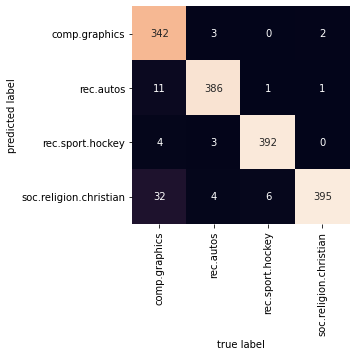

In [ ]:
categories = ['rec.autos', 'soc.religion.christian',
              'rec.sport.hockey', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(train.data, train.target)
labels = model.predict(test.data)

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]


print(predict_category("Porn is a vile creation of the devil"))
print(predict_category("Lebron James"))

print(predict_category("The tampa bay lightning the panthers yesterday"))

soc.religion.christian
soc.religion.christian
rec.sport.hockey


Model does better than I expected, thought it would be harder to distinguish between some of these


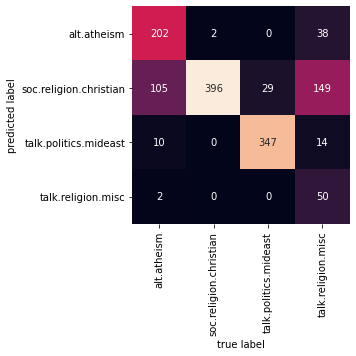

In [ ]:
categories = ['soc.religion.christian', 'alt.atheism','talk.politics.mideast', 'talk.religion.misc']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(train.data, train.target)
labels = model.predict(test.data)

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');
print("Model does better than I expected, thought it would be harder to distinguish between some of these")

# Challenge 2: Gaussian NB on Irises

Consider the standard Iris dataset and attempt to classify the species with GaussianNB. Apply a 50-50 train-test split, train the model, compute the accuracy of the predictions and construct the confusion matrix.

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .5) 


In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train);

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(model.predict(X_train), y_train))

0.9333333333333333


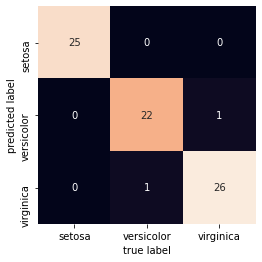

In [ ]:
labels = model.predict(X_test)

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

# Challenge 3: Gaussian NB on Digits

Consider the handwritten digits dataset from scikit-learn and attempt to classify the digits with GaussianNB. Apply the default train-test split, train a model, compute the accuracy score and construct the confusion matrix. Print a few examples where the model's prediction was wrong.

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y) 


In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train);

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(model.predict(X_train), y_train))

0.8648849294729027


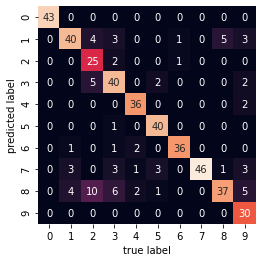

In [ ]:
labels = model.predict(X_test)

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

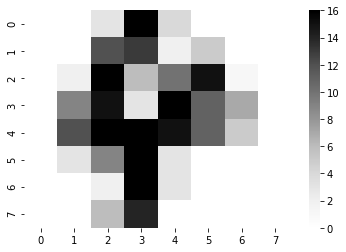

0


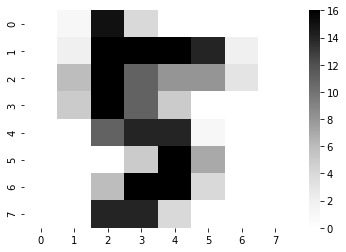

5


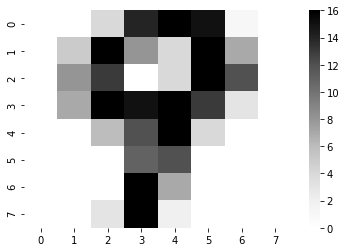

1


In [ ]:
wrong = np.where(model.predict(X_train) != y_train)
X_wrong = X_train[wrong]
sns.heatmap(np.reshape(X_wrong[2],(8,8)), cmap='Greys')
plt.show()
print(y[wrong][2])
sns.heatmap(np.reshape(X_wrong[5],(8,8)), cmap='Greys')
plt.show()
print(y[wrong][5])
sns.heatmap(np.reshape(X_wrong[10],(8,8)), cmap='Greys')
plt.show()
print(y[wrong][10])